**Application and implementation of electronic structure methods**   
by  
Prof. Jörg Neugebauer, Dr. Sarath Menon, Dr. Jing Yang, Ahmed Abdelkawy, and Prince Mathews (MPI für Eisenforschung, Düsseldorf)

# Exercise 3: Iterative solution to the 1D Schrödinger equation

**Key idea**: Avoid constructing the full Hamiltonian matrix (which is an $N\times N$ matrix) and a full diagonalization [`lg.eigh(hamiltonian)`], to get the eigenvalues and eigenvectors, which scales like $O(N^3)$. Rather, design an algorithm which is computationally much more efficient.

## The objective of this exercise is to implement the iterative scheme in object-oriented manner by using a class. To start with, a simple example of using a class in python is presented below

In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as lg

In [2]:
class schroedinger_1d:
    def __init__(self, mesh = 100, x_length = 4*np.pi, pot_type = 'cosine'):
        self.mesh = mesh
        self.x_length = x_length
        self.x, self.dx = np.linspace(0, x_length, self.mesh, endpoint=False, retstep=True)
        self.pot_type = pot_type
        
    def get_potential(self):
        if self.pot_type == 'cosine':
            pot_x = np.cos(self.x)
            return pot_x
        elif self.pot_type == 'sine':
            pot_x = np.sin(self.x)
            return pot_x
        else:
            print ("WARNING: The entered choice of potential not yet implemented. By default sin function returned")
            return np.sin(self.x)
        
#    def function_2(self):
#        set of commands
#          .
#          .
#          . 


#    def function_3(self):
#        set of commands
#          .
#          .
#          . 


#    def function_4(self):
#        set of commands
#          .
#          .
#          . 

#    and so on....


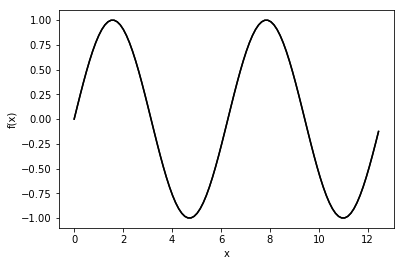

In [3]:
ham = schroedinger_1d(pot_type='sine') # creating an object 'ham' to access the class functions
    
# Use ham.var and ham.function() to access the variables and functions belonging to the class  
    
# Example 1 (calling a class function and storing the returned value in a variable):
potential = ham.get_potential()
plt.plot(ham.x, potential, '-k') 
    
# Example 2 (Accessing the class function directly):
plt.plot(ham.x, ham.get_potential(), '-k') 
    
plt.xlabel('x')
plt.ylabel('f(x)');

## Solving the Schrödinger equation

### We can determine the eigenvalues (energies) from the Schrödinger equation for an arbitrary wavefunction $\psi^\text{trial}$ by taking the expectation value of the Hamiltonian
$$ 
    E^\text{trial} = \langle\psi^\text{trial}\rvert 
                     \boldsymbol{\hat{H}}
                     \rvert\psi^\text{trial}\rangle
$$

### The residual can then be computed as

$$ 
    \rvert\Delta\psi^\text{res}\rangle 
    = \left(\boldsymbol{\hat{H}} - \hat{\mathbb{1}}E^\text{trial}\right) 
    \rvert\psi^\text{trial}\rangle 
$$

### Such a formulation will allow us to iteratively search for a wave function which minimizes the system energy. In this exercise you will write object-oriented code to accomplish this. This iterative problem can be splitted into following tasks:



### (1) Construct the Hamiltonian with kinetic (Laplacian) and potential energy contributions. Test the implementation for a known analytic function.

**Steps:**
 - define a class `schroedinger_1d` and implement the previously constructed functions for defining Laplacian (`def laplace_num(psi)`) and potential (`def potential_1d()`) within.
 - Construct the `def potential_1d()` so as to return either a **potential well** or a **sinusoidal** potential 
 - define a function `get_hamiltonian()` to return the Hamiltonian 
 - test your class implementation by applying the Laplacian to a known analytical function $f$
 
**Suggestion:** 
 - You may start by building up on the working sample of class layout defined above 

### (2) Calculate the energy (expectation value of $\hat{H}$) of an arbitrary trial wavefunction $\rvert\psi^\text{trial}\rangle$.   Use the Schrödinger equation to find the residual wavefunction $\rvert\Delta\psi^\text{res}\rangle$. Implement methods for calculating $E^\text{trial}$ and $\vert\Delta\psi^\text{res}\rangle$ in a class.

**Steps:**
 - implement a function `initialize_psi` to initialize the wavefunction as either a **random** or a **constant** wavefunction depending on user input
 - implement the functions `get_energy(psi)` and `get_residual(psi)` within the class to compute the expectation value of $\hat{H}$ and the corresponding residual $\rvert\Delta\psi^\text{res}\rangle$ respectively as defined above
 
**Suggestion:** 
 - You may use `np.dot()`  

### (3) Use the residual for a given state to iteratively improve the wavefunction (with $\alpha$ a suitably chosen scalar):
$$
\rvert\psi^\text{n+1}\rangle = \rvert\psi^\text{n}\rangle + 
\alpha \rvert\Delta\psi^\text{n, res}\rangle.
$$

### and normalize the improved wavefunction $\rvert\psi^\text{n+1}\rangle$:
$$
\rvert\psi^\text{n+1}\rangle = \frac{\rvert\psi^\text{n+1}\rangle}
{\sqrt{\langle\psi^\text{n+1}\rvert\psi^\text{n+1}\rangle}}
$$

**Steps:**
 - implement a function `get_next_psi(psi)` to update the wavefunction `psi` using the residual computed above and a parameter $\alpha$
 - implement a function `normalize(psi)` to normalize the updated wavefunction `new_psi`
 
**Suggestion:** 
 - Use `lg.norm()` to normalize. For ex., normalized `psi = psi / lg.norm(psi)`


### (5) Implement the above steps in a class. Start by constructing an initial trial wavefunction (e.g. a constant or random numbers).  Apply the above described iterative approach onto this trial wavefunction monitor the convergence by plotting the energy
$$ 
    E^n = \langle\psi^n\rvert 
          \boldsymbol{\hat{H}}
          \rvert\psi^n\rangle.
$$

### Optimize $\alpha$ to achieve a stable and fast convergence.

### (6) Visualize the resulting wavefunction.

### (7) Extend the above algorithm to excited states by projecting them onto the lower lying states using the Gram-Schmidt orthogonalization when performing step (3).  

**Steps:**
 - implement a function `orthogonalize(psi)` to project the wavefunction $\rvert\psi^\text{n+1}\rangle$ onto the lower states.
 - normalize the $\rvert\psi^\text{n+1}\rangle$ after orthogonalization as the states should be orthonormal to each other

### (8) Measure and compare the timing of the approach between the direct (full diagonalization) and the iterative approach.

**Suggestion:**
 - use `time` module as explained before